# Machine Learning Algorithm to detect digits written by hand with PyTorch
### Import necessary 

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from PIL import Image

### Define Transformation on DataSet

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(), # converts image into numbers (RGB) and scales them down to numbers between 0 and 1, stores them in a Tensor
    transforms.Normalize((0.5,), (0.5,)), # normalize the tensor with a mean and standard deciation
    ])

### Download the DataSet:

Comment: <br>
There is also a letter dataset in the EMNIST dataset.<br>
&emsp; trainset = datasets.EMNIST(path + "_train", split='letters', download=True, train=True, transform=transform) <br>
&emsp; testset = datasets.EMNIST(path + "_test", split='letters', download=True, train=False, transform=transform)

In [9]:
# seperate data in training- and testing-data
path = 'C:\\Users\\tvogt\\OneDrive\\Dokumente\\FH_Dortmund\\Master-Studienarbeit\\DatasetMNIST\\my_mnist'
trainset = datasets.MNIST(path + "_train", download=True, train=True, transform=transform)
testset = datasets.MNIST(path + "_test", download=True, train=False, transform=transform)
# creation of training and test data loaders with the corresponding data sets, 
# batch size of 64 and randomness of the data sequence (shuffle=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

### Exploratory Data Science to get to know the Dataset

Comment:<br>
Since the batch size in this example is 64, the images tuple will have a form of (64, 1, 28, 28), which means that there are 64 images with a size of 28x28 pixels, and each image has a colour channel dimension of 1 (since MNIST images are grey). The labels form will be (64) and will indicate the 64 associated digit labels corresponding to each of the 64 images in the batch.

In [10]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


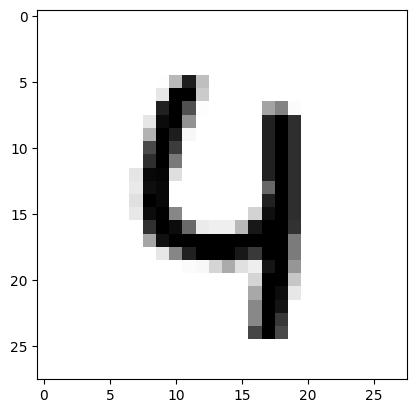

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

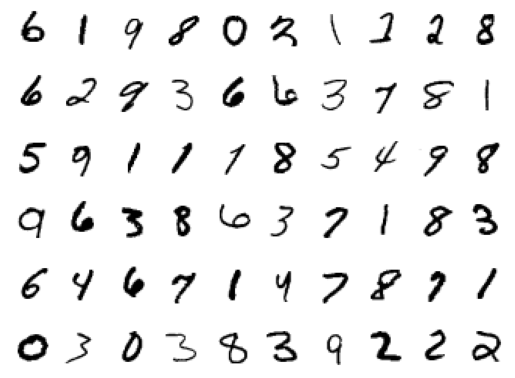

In [11]:
# show 60 of the images in a figure next to each other
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Build the Neural Network

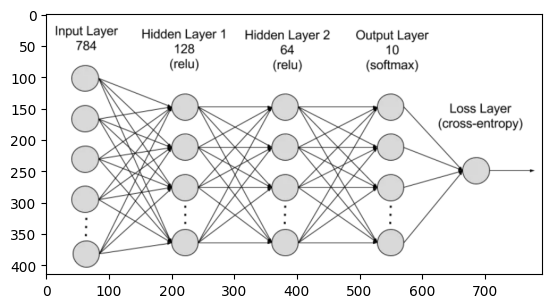

In [12]:
nn_img = np.asarray(Image.open("PytorchNN.png"))
plt.imshow(nn_img);

Comment: <br>
This code defines a neural network with three layers: an input layer, a hidden layer and an output layer (see image above). The network is created as an nn.Sequential object that contains a sequence of modules (i.e. layers) that are executed in order.

In [13]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(), # a simple function which allows positive values to pass through, whereas negative values are modified to zero
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.LogSoftmax(dim=1)) # logarithm of a Softmax function
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Comment: <br>
Here, the negative log-likelihood loss function (NLLLoss) is defined, applied to the input images and the NLL losses for the outputs are calculated

In [14]:
# define negative loss-likekihood loss
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

Comment: <br>
Here the gradient of the loss function with respect to the weights of the model is calculated and output. First, the gradient is output with the value None before the backward() method is called to calculate the gradient. Then the gradient value is output to check whether it has been updated.<br>
<br>
In a neural network, the weights are the parameters that are adjusted during training to optimise the output of the model. The gradient indicates how much the loss of the model is affected by a small change in the weights. During training, the gradient is calculated and used to adjust the weights to minimise the loss of the model.

In [15]:
# Adjusting weights
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[2.5252e-04, 2.5252e-04, 2.5252e-04,  ..., 2.5252e-04, 2.5252e-04,
         2.5252e-04],
        [6.4201e-04, 6.4201e-04, 6.4201e-04,  ..., 6.4201e-04, 6.4201e-04,
         6.4201e-04],
        [4.7458e-04, 4.7458e-04, 4.7458e-04,  ..., 4.7458e-04, 4.7458e-04,
         4.7458e-04],
        ...,
        [5.2405e-03, 5.2405e-03, 5.2405e-03,  ..., 5.2405e-03, 5.2405e-03,
         5.2405e-03],
        [3.8788e-05, 3.8788e-05, 3.8788e-05,  ..., 3.8788e-05, 3.8788e-05,
         3.8788e-05],
        [8.1689e-04, 8.1689e-04, 8.1689e-04,  ..., 8.1689e-04, 8.1689e-04,
         8.1689e-04]])


### Core Training Process

Comment:<br>
Here the model is trained. The Stochastic Gradient Descent (SGD) optimiser is used to update the weights of the model. The training process is carried out for a certain number of epochs (15 in this case). In each epoch, the training data set is run, calculating the loss and computing the gradient of the loss with respect to the weights of the model. Then the weights of the model are updated based on the gradient. At the end of each epoch, the average training loss is output.<br>
<br>

Typical optimizer:

- Stochastic Gradient Descent (SGD): The optimal SGD learning rate can be hard to find, but it is a simple and effective optimiser for many use cases.

- Adam: A popular choice for most use cases as it uses an adaptive learning rate algorithm and usually converges faster than SGD.

- Adagrad: A method of adjusting the learning rate for each weight or bias parameter based on the size of its historical gradient. It is often used for sparse data.

- RMSprop: An optimiser designed for better scaling of gradient values and better training for non-stationary problems.

- Adadelta: A learning rate adjustment method designed to make the learning process more stable by controlling the size of updates over time.

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6124261713374272
Epoch 1 - Training loss: 0.27683084042294065
Epoch 2 - Training loss: 0.21585012100208034
Epoch 3 - Training loss: 0.17272635411097806
Epoch 4 - Training loss: 0.14363162943930513
Epoch 5 - Training loss: 0.12302408657118138
Epoch 6 - Training loss: 0.10712787888940177
Epoch 7 - Training loss: 0.09605166323776883
Epoch 8 - Training loss: 0.08736519327413028
Epoch 9 - Training loss: 0.07971589633229889
Epoch 10 - Training loss: 0.07269074693858338
Epoch 11 - Training loss: 0.06693438775410482
Epoch 12 - Training loss: 0.061721009197833535
Epoch 13 - Training loss: 0.05705508600095355
Epoch 14 - Training loss: 0.05266757227499276

Training Time (in minutes) = 4.299017838637034


### Testing and Evaluation

Comment:<br>
The view_classify function takes an image and the probabilities of the image being classified by a neural network and displays them side by side. The image is shown in the left axis, while the right axis is a horizontal bar graph with the probabilities for each class. The version parameter indicates whether the dataset is MNIST or FashionMNIST and is used to adjust the labels of the y-axis of the bar chart.

In [19]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

Predicted Digit = 4


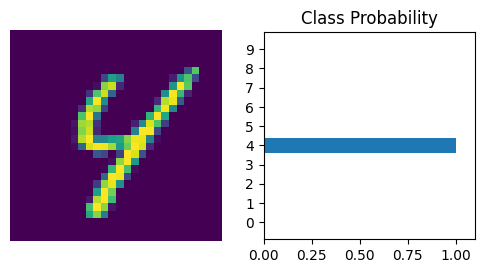

In [35]:
# In this code section, a single image is selected from the test set and evaluated with the trained model
i = 22 # selects the random picture 22
images, labels = next(iter(testloader))# loads the test set

img = images[i-1].view(1, 784) # formats it for input into the model
with torch.no_grad():
    logps = model(img) # applies the model to the selected image and returns the log-likelihoods for each class

ps = torch.exp(logps) # converts the logarithmised probabilities into normal probabilities
probab = list(ps.numpy()[0]) # stores the probabilities for each class in a list
print("Predicted Digit =", probab.index(max(probab))) # outputs the class with the highest probability as a prediction
view_classify(img.view(1, 28, 28), ps) # display the image with its probability